Grupo 7 

In [254]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import re
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt
from unidecode import unidecode 


In [370]:
# traigo el dataset Properatti

df_properatti= pd.read_csv('../properatti.csv',sep=',')
print(df_properatti.shape)
df_properatti.head(5)

(121220, 26)


,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
0,0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,...,40.0,1127.272727,1550.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bo8_venta_ph_mat...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,https://thumbs4.properati.com/8/BluUYiHJLhgIIK...
1,1,sell,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,3432039.0,"-34.9038831,-57.9643295",-34.903883,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15bob_venta_depart...,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,https://thumbs4.properati.com/7/ikpVBu2ztHA7jv...
2,2,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6522615,-58.5229825",-34.652262,...,55.0,1309.090909,1309.090909,NaN,NaN,NaN,http://www.properati.com.ar/15bod_venta_depart...,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,https://thumbs4.properati.com/5/SXKr34F_IwG3W_...
3,3,sell,PH,Liniers,|Argentina|Capital Federal|Liniers|,Argentina,Capital Federal,3431333.0,"-34.6477969,-58.5164244",-34.647797,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15boh_venta_ph_lin...,PH 3 ambientes con patio. Hay 3 deptos en lote...,PH 3 amb. cfte. reciclado,https://thumbs4.properati.com/3/DgIfX-85Mog5SP...
4,4,sell,apartment,Centro,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,Buenos Aires Costa Atlántica,3435548.0,"-38.0026256,-57.5494468",-38.002626,...,35.0,1828.571429,1828.571429,NaN,NaN,NaN,http://www.properati.com.ar/15bok_venta_depart...,DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURA...,DEPTO 2 AMB AL CONTRAFRENTE ZONA CENTRO/PLAZA ...,https://thumbs4.properati.com/5/xrRqlNcSI_vs-f...


In [331]:
# nombre columnas
list(df_properatti.columns)

['Unnamed: 0',
 'operation',
 'property_type',
 'place_name',
 'place_with_parent_names',
 'country_name',
 'state_name',
 'geonames_id',
 'lat-lon',
 'lat',
 'lon',
 'price',
 'currency',
 'price_aprox_local_currency',
 'price_aprox_usd',
 'surface_total_in_m2',
 'surface_covered_in_m2',
 'price_usd_per_m2',
 'price_per_m2',
 'floor',
 'rooms',
 'expenses',
 'properati_url',
 'description',
 'title',
 'image_thumbnail']

In [332]:
# primer valor de cada columna
for column in df_properatti.columns:
    print(f"{column}: {df_properatti[column].iloc[0]}")

Unnamed: 0: 0
operation: sell
property_type: PH
place_name: Mataderos
place_with_parent_names: |Argentina|Capital Federal|Mataderos|
country_name: Argentina
state_name: Capital Federal
geonames_id: 3430787.0
lat-lon: -34.6618237,-58.5088387
lat: -34.6618237
lon: -58.5088387
price: 62000.0
currency: USD
price_aprox_local_currency: 1093959.0
price_aprox_usd: 62000.0
surface_total_in_m2: 55.0
surface_covered_in_m2: 40.0
price_usd_per_m2: 1127.2727272727273
price_per_m2: 1550.0
floor: nan
rooms: nan
expenses: nan
properati_url: http://www.properati.com.ar/15bo8_venta_ph_mataderos_lavadero_patio_inmobiliaria-fedele
description: 2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO, REFACCIONADO A NUEVO, PATIO GRANDE, CON LAVADERO, LIVING COMEDOR CON COCINA INTEGRADA, ARTEFACTO DE COCINA, ALACENA, BAÑO COMPLETO, Y DORMITORIO. TODO EN EXCELENTE ESTADO, PARA HABITAR.NO ES APTO CREDITO Aviso publicado por Pixel Inmobiliario (Servicio de Páginas Web para Inmobiliarias).
title: 2 AMB TIPO CASA SIN EXPENS

In [333]:
# importo el Mapa de Argentina CON info por provincias

data_location = "./provincias/provincia.shx"
mapa_argentina = gpd.read_file(data_location)

# importo el Mapa (2) de Argentina SIN info por provincias

mundo = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
mapa_argentina_2 = mundo[mundo.name == "Argentina"]

mapa_argentina.head(24)

/var/folders/cv/c6ctbt612w9_hm1ltt9l68vc0000gn/T/ipykernel_908/3730548221.py:8: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  mundo = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))


,gid,entidad,fna,gna,nam,in1,fdc,sag,geometry
0,1,0,Ciudad Autónoma de Buenos Aires,Ciudad Autónoma,Ciudad Autónoma de Buenos Aires,02,Geografía,IGN,"POLYGON ((-58.45535 -34.52776, -58.45404 -34.5..."
1,2,0,Provincia del Neuquén,Provincia,Neuquén,58,Geografía,IGN,"POLYGON ((-70.39341 -36.15624, -70.39333 -36.1..."
2,3,0,Provincia de San Luis,Provincia,San Luis,74,Geografía,IGN,"POLYGON ((-67.05547 -31.85605, -67.05000 -31.8..."
3,4,0,Provincia de Santa Fe,Provincia,Santa Fe,82,Geografía,IGN,"POLYGON ((-61.04639 -27.99800, -61.00805 -27.9..."
4,5,0,Provincia de La Rioja,Provincia,La Rioja,46,Geografía,IGN,"POLYGON ((-68.52136 -27.81792, -68.52148 -27.8..."
5,6,0,Provincia de Catamarca,Provincia,Catamarca,10,Geografía,IGN,"POLYGON ((-68.50537 -25.16851, -68.50386 -25.1..."
6,7,0,Provincia de Tucumán,Provincia,Tucumán,90,Geografía,IGN,"POLYGON ((-65.35915 -26.05944, -65.35868 -26.0..."
7,8,0,Provincia del Chaco,Provincia,Chaco,22,Geografía,IGN,"POLYGON ((-62.32434 -24.12318, -62.31959 -24.1..."
8,9,0,Provincia de Formosa,Provincia,Formosa,34,Geografía,IGN,"POLYGON ((-62.31201 -22.48666, -62.31056 -22.4..."
9,10,0,Provincia de Santa Cruz,Provincia,Santa Cruz,78,Geografía,IGN,"MULTIPOLYGON (((-67.59361 -46.01744, -67.59357..."


<AxesSubplot:>

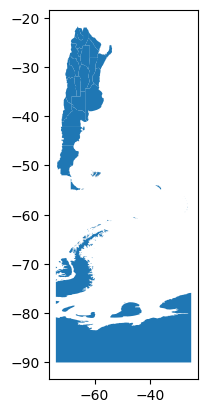

In [334]:
# este mapa trae info de provincias. 
mapa_argentina.plot()

<AxesSubplot:>

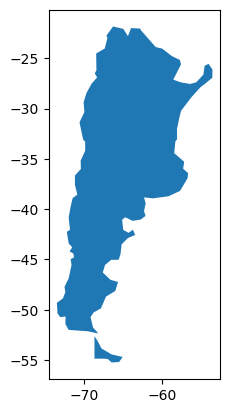

In [260]:
# este mapa no trae info de provincias (mas practico para ploteo general de todas las propiedades)

mapa_argentina_2.plot()

<AxesSubplot:>

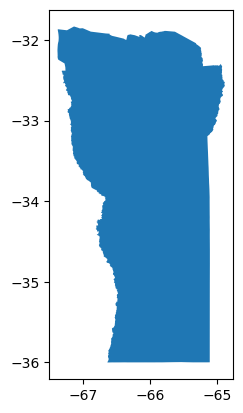

In [261]:
# ejemplo con una provincia

mapa_san_luis = mapa_argentina[mapa_argentina.fna == "Provincia de San Luis"]
mapa_san_luis.plot()

In [262]:
# Dataframe con la info sobre geonames_id

location_geonames = 'provincias/AR/AR.csv'
data_geonames = gpd.read_file(location_geonames, sep='\t')

# convierte a float64 la columna 'GEONAMEID' que es un string 

data_geonames['GEONAMEID'] = pd.to_numeric(data_geonames['GEONAMEID'], errors='coerce').astype(float)
data_geonames.dtypes

data_geonames.head(3)

,GEONAMEID,NAME,ASCIINAME,ALTNAMES,LATITUDE,LONGITUDE,FEATCLASS,FEATCODE,COUNTRY,CC2,ADMIN1,ADMIN2,ADMIN3,ADMIN4,POPULATION,ELEVATION,GTOPO30,TIMEZONE,MODDATE,geometry
0,3427200.0,Sierra del 15,Sierra del 15,,-37.96613,-57.94670,T,HLL,AR,,01,06357,,,0.0,NaN,200,America/Argentina/Buenos_Aires,2016-01-30,POINT (-57.94670 -37.96613)
1,3427201.0,Puesto 1 Napoleón Cué,Puesto 1 Napoleon Cue,,-28.63333,-56.11667,S,HSE,AR,,06,18168,,,0.0,NaN,79,America/Argentina/Cordoba,2016-01-30,POINT (-56.11667 -28.63333)
2,3427202.0,Cañada del Zorro,Canada del Zorro,,-32.16667,-59.50000,H,STM,AR,,08,,,,0.0,NaN,65,America/Argentina/Cordoba,1993-12-21,POINT (-59.50000 -32.16667)


In [263]:
# filtro solo el nombre de la provincia y creo una columna llamada 'provincia'

pattern = re.compile(r'/([^/]+)$') 

def cambiar_nombre(timezone):
    match = re.search(pattern, timezone)
    return match.group(1).replace('_', ' ') if match else None

data_geonames['provincia'] = data_geonames['TIMEZONE'].apply(lambda x: cambiar_nombre(x))
data_geonames.head(5)

,GEONAMEID,NAME,ASCIINAME,ALTNAMES,LATITUDE,LONGITUDE,FEATCLASS,FEATCODE,COUNTRY,CC2,...,ADMIN2,ADMIN3,ADMIN4,POPULATION,ELEVATION,GTOPO30,TIMEZONE,MODDATE,geometry,provincia
0,3427200.0,Sierra del 15,Sierra del 15,,-37.96613,-57.94670,T,HLL,AR,,...,06357,,,0.0,NaN,200,America/Argentina/Buenos_Aires,2016-01-30,POINT (-57.94670 -37.96613),Buenos Aires
1,3427201.0,Puesto 1 Napoleón Cué,Puesto 1 Napoleon Cue,,-28.63333,-56.11667,S,HSE,AR,,...,18168,,,0.0,NaN,79,America/Argentina/Cordoba,2016-01-30,POINT (-56.11667 -28.63333),Cordoba
2,3427202.0,Cañada del Zorro,Canada del Zorro,,-32.16667,-59.50000,H,STM,AR,,...,,,,0.0,NaN,65,America/Argentina/Cordoba,1993-12-21,POINT (-59.50000 -32.16667),Cordoba
3,3427203.0,Estancia Zorraquín,Estancia Zorraquin,,-31.51553,-58.55208,S,RNCH,AR,,...,30113,,,0.0,NaN,71,America/Argentina/Cordoba,2016-01-30,POINT (-58.55208 -31.51553),Cordoba
4,3427204.0,Estancia Zequeira Cué,Estancia Zequeira Cue,,-28.43825,-56.08838,S,RNCH,AR,,...,18168,,,0.0,NaN,98,America/Argentina/Cordoba,2016-01-30,POINT (-56.08838 -28.43825),Cordoba


In [345]:
# cuento cuantas filas hay en df_properatti que no tienen ninguna info geografica
mask_lat_lon = np.logical_and(df_properatti['lat'].isnull(), df_properatti['lon'].isnull())
mask_geonames = np.logical_and(df_properatti['lat-lon'].isnull(), df_properatti['geonames_id'].isnull() )
combined_mask = mask_lat_lon & mask_geonames


head_of_filtered_df = df_properatti.loc[mask_lat_lon]
head_of_filtered_df.shape



(0, 29)

In [336]:
# Chequeo si falta algun dato de lugar(pais provincia ciudad)

df_properatti.place_with_parent_names.isnull().sum()

# Todos tienen algun tipo de informacion de lugar(pais provincia ciudad)

0

In [429]:
# Busca un string
substring_to_search = 'Villa Merc'

# Creo mascara booleana
substring_mask = data_geonames['NAME'].str.contains(substring_to_search, case=False)
print(data_geonames[substring_mask].shape)

data_geonames['provincia'].value_counts()

(5, 21)


provincia
Cordoba         15357
Buenos Aires    10499
Salta            8444
Catamarca        4155
Rio Gallegos     3081
Mendoza          2971
San Juan         1688
Jujuy            1650
San Luis         1605
La Rioja         1421
Tucuman           719
Ushuaia           566
Santiago          267
Sao Paulo          26
Stanley            10
Montevideo          8
Asuncion            5
Punta Arenas        4
Troll               1
Fortaleza           1
Palmer              1
Rothera             1
Name: count, dtype: int64

In [392]:
# Limpio la columna 'place_with_parent_name' y creo columnas con info de 'provincia' y 'ciudad'

pattern = re.compile(r'\|(?P<pais>[^|]+)\|(?P<provincia>[^|]+)\|(?P<ciudad>[^|]+)')

def extract_parts(location_info):
    match = pattern.search(location_info)
    return {'provincia': match.group('provincia') if match else None, 'ciudad': match.group('ciudad') if match else None}

df_properatti[['provincia', 'ciudad']] = df_properatti['place_with_parent_names'].apply(
    lambda x: pd.Series(extract_parts(x)),
)



In [394]:
# Capital Federal queda dentro de la Provincia de Buenos Aires

def clean_capital(row):
    if row['provincia'] == 'Capital Federal':
        row['provincia'] = 'Buenos Aires'
        row['barrio'] = row['ciudad']
        row['ciudad'] = 'Capital Federal'
    return row

df_properatti = df_properatti.apply(clean_capital, axis=1)

In [395]:
# Uso regex para limpiar Bs.As. y demas formas de Buenos Aires.
pattern = re.compile(r'\b(Bs\.As\.\s|Buenos Aires)\b')


def match_location(location_info):
    if not isinstance(location_info, (str, bytes)): # gracias ChatGPT
        return location_info
    
    match = pattern.search(location_info)
    return 'Buenos Aires' if match else location_info

# Apply the function to the 'provincia' column using apply
df_properatti['provincia'] = df_properatti['provincia'].apply(match_location)

In [396]:
# Si Barrio es NaN, uso la info de 'place' 

df_properatti['barrio'].fillna(df_properatti['place_name'], inplace=True)

In [402]:
# Filtro los acentos
columns_2 = ['provincia', 'ciudad', 'barrio']
# Create a function to remove accents from a string
def remove_accents(text):
    return unidecode(text) if pd.notna(text) else text

# Apply the function to specified columns

df_properatti[columns_2] = df_properatti[columns_2].applymap(remove_accents)

df_properatti['provincia'].value_counts()
# df_properatti.head(3)

/var/folders/cv/c6ctbt612w9_hm1ltt9l68vc0000gn/T/ipykernel_908/871853082.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_properatti[columns_2] = df_properatti[columns_2].applymap(remove_accents)


provincia
Buenos Aires           91706
Santa Fe               10139
Cordoba                 9421
Rio Negro                800
Neuquen                  723
Tucuman                  597
Corrientes               581
Mendoza                  551
Misiones                 420
Entre Rios               369
Salta                    257
Chubut                   242
San Luis                 228
La Pampa                 154
Formosa                   65
Chaco                     56
San Juan                  33
Tierra Del Fuego          25
Jujuy                     25
Catamarca                 24
Santa Cruz                20
La Rioja                   3
Santiago Del Estero        1
Name: count, dtype: int64

In [409]:
# chequea cuanta info geografica falta 
columns = ['lat', 'lon', 'lat-lon', 'geonames_id']
df_properatti[columns].head(10)

df_properatti['non_null_count'] = df_properatti[['lat', 'lon', 'lat-lon', 'geonames_id']].count(axis=1)


filtered_df = df_properatti[
    (df_properatti['non_null_count'] == 4) #|  
    #(df_properatti['non_null_count'] == 3) |  
    #(df_properatti['non_null_count'] == 2) |  
    #(df_properatti['non_null_count'] == 1) |  
    #(df_properatti['non_null_count'] == 0)
]

filtered_df.head


<bound method NDFrame.head of     Condition  Count  Percentage
0          28  18876   15.571688
1          24  17175   14.168454
2          27  15369   12.678601
3          22  12034    9.927405
4          26  12005    9.903481
5          25  10956    9.038113
6          23   8528    7.035143
7          21   6147    5.070945
8          20   5453    4.498433
9          18   4846    3.997690
10         19   2948    2.431942
11         17   2651    2.186933
12         29   1925    1.588022
13         16   1108    0.914041
14         30    598    0.493318
15         15    408    0.336578
16         14    175    0.144366
17         13     17    0.014024
18         12      1    0.000825>

In [430]:
# Si  no hay info de 'lat' o 'lon', me traigo los valores 'LATITUDE' y 'LONGITUDE' de data_geonames que matcheen con la provincia y ciudad

def find_ciudad_province_in_data_geonames(row):
    if pd.isnull(row['lat']) and pd.isnull(row['lon']):
        provincia = row['provincia']
        ciudad = row['ciudad']
        
        matching_rows = data_geonames[data_geonames['NAME'].isin([ciudad])]

        if not matching_rows.empty:
            matching_row = matching_rows.iloc[0]
            row['lat'] = pd.to_numeric(matching_row['LATITUDE']).astype(float) 
            row['lon'] = pd.to_numeric(matching_row['LONGITUDE']).astype(float)
            row['it_works'] = 'it works'

    return row

df_properatti = df_properatti.apply(find_ciudad_province_in_data_geonames, axis=1)



In [443]:
mask = np.logical_and(pd.isnull(df_properatti['lat']),pd.isnull(df_properatti['lon'] ))
mask_2 = pd.isnull(df_properatti['lat-lon'])

df_properatti[mask][columns].head(10)

,lat,lon,lat-lon,geonames_id
777,NaN,NaN,NaN,NaN
4671,NaN,NaN,NaN,NaN
5226,NaN,NaN,NaN,NaN
5359,NaN,NaN,NaN,NaN
5620,NaN,NaN,NaN,NaN
5666,NaN,NaN,NaN,NaN
5700,NaN,NaN,NaN,NaN
6155,NaN,NaN,NaN,NaN
6156,NaN,NaN,NaN,NaN
6157,NaN,NaN,NaN,NaN


In [440]:
# busca los valores de 'geonames_id' en el dataframe 'data_geonames'
# cuando los encuentra, se trae el valor de las columnas 'LATITUDE' y 'LONGITUDE'

def normalize_geonameid(row):
    if pd.isnull(row['lat']) and pd.isnull(row['lon']):
        geoname_id = row['geonames_id']
        if geoname_id in data_geonames['GEONAMEID'].values:
            matching_row = data_geonames[data_geonames['GEONAMEID'] == geoname_id]
            if not matching_row.empty:
                row.loc['lat'] = pd.to_numeric(matching_row['LATITUDE'].values[0], errors='coerce')
                row.loc['lon'] = pd.to_numeric(matching_row['LONGITUDE'].values[0], errors='coerce')
    return row

df_properatti = df_properatti.apply(normalize_geonameid, axis=1)

In [447]:
# Filtro los que no tienen info geografica (no hay match en data_geonames)

mask_not_null = np.logical_and(~pd.isnull(df_properatti['lat']),~pd.isnull(df_properatti['lon'] ))

df_properatti_for_plot = df_properatti[mask_not_null][['lat','lon']]

df_properatti_for_plot.shape

(118796, 2)

In [449]:
# creo un geoDataFrame con la info geografica 
geometry = gpd.points_from_xy(pd.to_numeric(df_properatti_for_plot.lon), pd.to_numeric(df_properatti_for_plot.lat))
geometry

df_properatti = gpd.GeoDataFrame(geometry=geometry)
df_properatti.shape


(118796, 1)

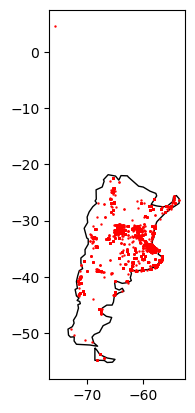

In [453]:
# Mapa de Argentina
ax = mapa_argentina_2.plot(color='white', edgecolor='black')

# Sobre las ciudades superpone el mapa del país
df_properatti.plot(ax=ax, color='red', markersize=0.1)

plt.show()

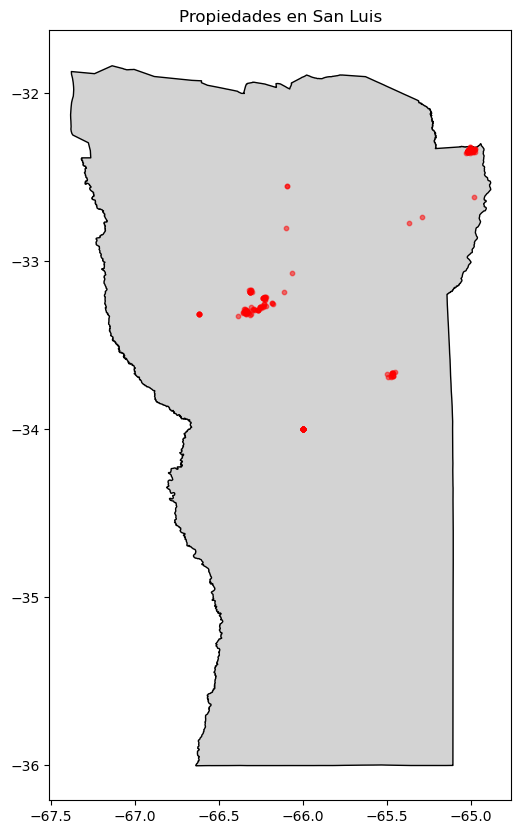

In [452]:
# filtro los puntos que estan dentro de 'mapa_san_luis' 

contained_points = df_properatti[df_properatti.geometry.within(mapa_san_luis.unary_union)]

# plot del mapa_san_luis
ax = mapa_san_luis.plot(figsize=(10, 10), color='lightgray', edgecolor='black')
contained_points.plot(ax=ax, color='red', marker='o', markersize=10, alpha=0.5)
plt.title('Propiedades en San Luis')
plt.show()